# Análise sobre o Tempo de Entrega

A base de dados utilizada está presente em ```data/data.xlsx```

A sua descrição está presente em ```data/description.txt```

Autores:
* David Joshua;
* Gabriel Cavalcanti Araújo;
* Gabriel Emannuel Gama Andrade.

## 1. Preparando o ambiente

### 1.1 Baixando os pacotes Necessários 

Abaixo estará o download de todos os pacotes úteis para a realização da análise

In [36]:
install.packages("pacman")

library(pacman)

pacman :: p_load(
    rio, # Importação fácil dos arquivos XLSX
    dplyr, # Permitir diversas formas de manipulação de dados
    skimr, # Utilização de outras formas de sumarizar os dados (Além da função built-in do R)
    psych, # Mesmo motivo do uso da skimr, melhorando a análise da base de dados
    )

Installing package into ‘/home/ferte/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)


Your package installed

Warning message in pacman::p_load(rio, dplyr, skimr, psych, ):
“Failed to install/load:
”


### 1.2 Carregando a base de dados em memória

Abaixo estará o carregamento da base de dados para a memória

In [37]:
DIRETORIO_DATA_SET <- "data/data.xlsx"

data <- import(DIRETORIO_DATA_SET)

data_numeric <- data %>% select_if(is.numeric)

### 1.3 Criando constantes para as Legendas

Em virtude que os gráficos irão possuir legendas comuns, em virtude das colunas que serão usadas para a geração do gráfico, esta seção irá determinar as constantes que serão usadas.

In [38]:
LEGENDA_TEMPO <- "Tempo da Entrega"
LEGENDA_DISTANCA <- "Distância da Entrega"
LEGENDA_VOLUME <- "Volume de pacotes"
LEGENDA_CAPACIDADE <- "Capacidade da Frota"
LEGENDA_INVESTIMENTO <- "Investimendo de Logística"
LEGENDA_TRAFEGO <- "Tráfego"
LEGENDA_NUMERO <- "Número de paradas"

## 2. Introdução

Iremos sumarizar o conjunto de dados, utilizando as funções à nossa disposição, com o fim de entender a base de dados e possíveis relacionamentos

### 2.1 Utilizando as funções built-in do R

A função summary é simples, mas resume as características dos dados eficientemente e é uma boa primeira vista de qualquer base de dados.

---

Informações importantes que a função traz para cada coluna numérica:
* Intervalos de valores (Valor mínimo e Máximo);
    * Também é apresentado o "comportamento" de crescimento, com os quantis e a mediana.
* Média;
* Valores ausentes.

In [39]:
summary(data)

 Distancia_entrega Volume_pacotes   Capacidade_frota Investimento_logistica
 Min.   :  8.926   Min.   : 50.56   Min.   : 68.53   Min.   : 5.447        
 1st Qu.: 41.454   1st Qu.: 75.65   1st Qu.: 81.85   1st Qu.:27.143        
 Median : 53.427   Median : 80.68   Median : 86.67   Median :34.112        
 Mean   : 52.836   Mean   : 80.98   Mean   : 86.54   Mean   :34.749        
 3rd Qu.: 63.448   3rd Qu.: 86.38   3rd Qu.: 91.00   3rd Qu.:42.474        
 Max.   :112.060   Max.   :106.66   Max.   :107.88   Max.   :62.487        
 NA's   :21        NA's   :21       NA's   :21       NA's   :21            
 Infraestrutura_rodoviaria    Trafego       Tecnologia_rastreamento
 Length:700                Min.   :-25.38   Length:700             
 Class :character          1st Qu.: 12.51   Class :character       
 Mode  :character          Median : 23.74   Mode  :character       
                           Mean   : 22.89                          
                           3rd Qu.: 33.21           

Em relação ao tipo das colunas:

<center>
  <table>
    <tr>
      <th>Tipo</th>
      <th>Quantidade</th>
    </tr>
    <tr>
      <th>Numérico</th>
      <th>7¹</th>
    </tr>
    <tr>
      <th>Textual (Categórico)²</th>
      <th>2</th>
    </tr>
  </table>
</center>

Observações:

* ¹ A coluna da variável dependente está sendo contada!
* ² Os valores categóricos serão melhores explorados em seções posteriores.

Dentre os valores numéricos, iremos utilizar a descrição textual da base de dados na tentativa de inferir o impacto de cada uma das colunas na variável dependente (O tempo de entrega):

<center>
  <table>
    <tr>
      <th>Coluna</th>
      <th>Proporcionalidade</th>
      <th>Motivo</th>
    </tr>
    <tr>
      <th>Distância</th>
      <th>Diretamente</th>
      <th>Quanto maior a distância, a viagem será mais longa.</th>
    </tr>
    <tr>
      <th>Volume</th>
      <th>Diretamente</th>
      <th>Quanto mais carga, será necessário mais cuidado na direção, causando mais lentidão na viagem.</th>
    </tr>
    <tr>
      <th>Capacidade</th>
      <th>Diretamente</th>
      <th>Quanto mais carga é possível ser levada, maior será o veículo, sendo necessário mais controle na direção.</th>
    </tr>
    <tr>
      <th>Investimento</th>
      <th>Inversamente</th>
      <th>Quanto mais planejado o transporte da carga, melhor será a escolha das rotas, dessa forma será mais rápido.</th>
    </tr>
    <tr>
      <th>Tráfego</th>
      <th>Diretamente</th>
      <th>Maior o trãnsito, mais lenta será a viagem.</th>
    </tr>
    <tr>
      <th>Número de paradas</th>
      <th>Diretamente</th>
      <th>Quanto mais paradas, mais lento.</th>
    </tr>
  </table>
</center>

Vamos testar com a função built-in do R que calcula a correlação linear!

In [40]:
correlacao_linear_de_pearson <- as.data.frame(
    cor( ,
        method = "pearson",
        use = "complete.obs"))

correlacao_tempo <- correlacao_linear_de_pearson[7]

correlacao_tempo

ERROR: Error in cor(, method = "pearson", use = "complete.obs"): argument "x" is missing, with no default


Não vamos nos assustar com esses resultados! Vale lembrar que a correlação linear é calculada considerando apenas a relação das duas variáveis no conjunto de dados, não considerando o relacionamento das mesmas com o resto do conjunto. Um exemplo é que não estamos considerando apenas a distância com o tempo, visto que nos casos que ocorreram altas distâncias, o tráfego poderia ter sido irrisório, vice-versa também podendo ocorrer.

O que esses dados mostram, de fato, é que não podemos considerar muitas dessas colunas isoladamente, possívelmente tendo melhores resultados utilizando uma regressão múltipla (mas não vamos nos apressar ainda, iremos analisar melhor o conjunto para ter uma maior profundidade).
* O motivo disto, é que informações que obviamente deveriam ser importantes, não estão sendo (pelo menos, não linearmente). Deste modo, temos certeza que ao menos valerá a pena um estudo de regressão em conjunto.

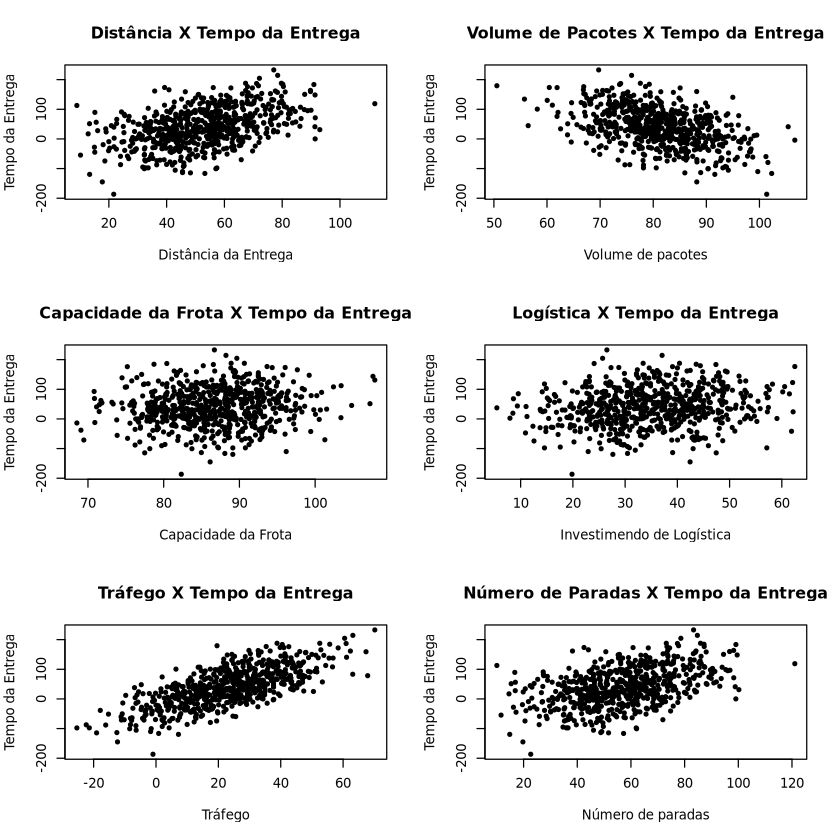

In [44]:
par(mfrow=c(3,2))

plot(x = data_numeric$Distancia_entrega,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_DISTANCA,
     ylab=LEGENDA_TEMPO,
     main = "Distância X Tempo da Entrega"
     )

plot(x = data_numeric$Volume_pacotes,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_VOLUME,
     ylab=LEGENDA_TEMPO,
     main = "Volume de Pacotes X Tempo da Entrega")

plot(x = data_numeric$Capacidade_frota,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_CAPACIDADE,
     ylab=LEGENDA_TEMPO,
     main = "Capacidade da Frota X Tempo da Entrega")

plot(x = data_numeric$Investimento_logistica,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_INVESTIMENTO,
     ylab=LEGENDA_TEMPO,
     main = "Logística X Tempo da Entrega")

plot(x = data_numeric$Trafego,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_TRAFEGO,
     ylab=LEGENDA_TEMPO,
     main="Tráfego X Tempo da Entrega")

plot(x = data_numeric$Numero_paradas,
     y = data_numeric$Tempo_entrega,
     pch=20,
     xlab=LEGENDA_NUMERO,
     ylab=LEGENDA_TEMPO,
     main="Número de Paradas X Tempo da Entrega")